<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/main/Aleshin%20Denis/%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%D0%B0_!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Рекомендательная система для профпатолога**

# Техническое задание

**Рекомендательная система для профпатолога (INSPECTRUM CLINIC)**

* Цель:

  Разработать прототип системы, реализующей функцию рекомендательной системы для врача профпатолога.
* Принцип работы:

  Система должна помогать врачу вынести решение о том годен, не годен или ограниченно годен человек на определенной должности.
  В датасете целевым столбцом для предсказания нейросетью является столбец под названием: “ЗаключениеМК”.
  Система может дополнять вердикт мнением, почему человек не годен, или почему ограниченно годен.
* Требования интерфейсу:

  Минимальный уровень реализации: notebook google colaboratory. Требуется реализовать простой веб-интерфейс для загрузки анализируемого моделью нейросети набора данных и удобным выводом результатов вынесенного решения.
Дополнительно: передача продвинутой системы веб-интерфейса, дополняющей вердикт мнением, почему человек не годен, или почему ограниченно годен.
* Требования к скорости работы:

  Не предъявляются
* Требования к тестированию, метрикам качества:

  Оценка результатов работы системы производится Заказчиком на тестовом наборе Заказчика. Метрика точности - точность рекомендации должна быть не ниже 95%.


# Подключение библиотек

In [ ]:
# Загрузка файлов из облака
import gdown

import numpy as np
import pandas as pd
import gdown
import re
import os

from tensorflow.keras.preprocessing.text import Tokenizer
# Используем для работы с категориальными данными
from tensorflow.keras import utils
# Для разбивки на выборки
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
# Отрисовка изображений
import matplotlib.pyplot as plt


# Загрузка данных

## Загружаем последний датасет

In [ ]:
# Загружаем последний датасет

url= 'https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv'

df = pd.read_csv(url, sep=';', error_bad_lines=False, encoding='utf-8' )

print(df.shape)

<ipython-input-549-53d87bf80e74>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, sep=';', error_bad_lines=False, encoding='utf-8' )
<ipython-input-549-53d87bf80e74>:5: DtypeWarning: Columns (16,18,19,20,22,23,25,26,27,29,30,32,35,36,37,39,40,41,42,43,44,46,47,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,66,68,70,74,75,77,78,80,81,82,84,85,87,90,91,92,95,96,97,99,100,101,103,104,108,109,114,115,116,120,122,123,124,126,127,128,130,131,133,138,139,142,143,145,146,148,149,153,154,155,157,158,160,161,162,164,165,167,168,170,171,173,175,176,177,178,179,180,181,182,183,184,188,189,191,192,194,195,196,201,202,204,208,209,210,211,214,215,216,217,218,220,221,222,224,225,228,229,230,231,233,234,235,236,240,241,242,243,244,245,246,247,248,250,258,260,262,265,266,269,270,272,273,274,276,277,278,280,281,282,283,284,285,286,287,288) have mixed types. Specify dtype option on import or 

(32686, 289)


## Загрузка файла архива датасетов

In [ ]:
# Загрузка файла архива датасетов
url = 'https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/26.06%20new%20dataset.zip'
gdown.download(url, quiet=False)

Downloading...
From: https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/26.06%20new%20dataset.zip
To: /content/26.06%20new%20dataset.zip
100%|██████████| 6.97M/6.97M [00:01<00:00, 4.49MB/s]


'26.06%20new%20dataset.zip'

In [ ]:
!unzip -q /content/26.06%20new%20dataset.zip

In [ ]:
dirdata = '/content/26.06 new dataset'
files = os.listdir(dirdata)
print('список файлов:', files)

список файлов: ['neiro_06-22.csv', 'neiro_02_23.csv', 'neiro_04-22.csv', 'neiro_03-22.csv', 'neiro_12-22.csv', 'neiro_07-22.csv', 'neiro_06-23.csv', 'neiro_01-22.csv', 'neiro-08-22.csv', 'neiro_02-22.csv', 'neiro_05-22.csv', 'neiro_03_23.csv', 'neiro-09-22 (1).csv', 'neiro_05_23.csv', 'neiro-10-22.csv', 'neiro_04_23.csv', 'neiro_01_23.csv']


In [ ]:
#  создаем общий для всех датасетов заголовок
header_df = ['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Цех', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ВредныеФакторы']
for i in range(len(header_df),458):
  header_df.append(str(i))

print(header_df)
print(len(header_df))


['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Цех', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ВредныеФакторы', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '12

In [ ]:
df.columns = header_df[:df.shape[1]]
print(f' файл ... записей {df.shape}')

for f in files:
  url = dirdata +'/'+ f
  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')
  df1.columns = header_df[:df1.shape[1]]
  print(f'{files.index(f)} файл {f} записей {df1.shape}')
  df = pd.concat([df, df1], ignore_index= True )

print('-'*30)

print(df.info())

<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


 файл ... записей (32686, 289)
0 файл neiro_06-22.csv записей (1891, 458)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


1 файл neiro_02_23.csv записей (1363, 290)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


2 файл neiro_04-22.csv записей (1850, 306)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')
<ipython-input-554-0c106a3b0697>:6: DtypeWarning: Columns (10,11,12,13,14,22,23,24,25,26,27,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,80,81,82,83,84,85,88,89,96,97,98,99,108,109,110,111,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,166,167,168,169,170,171,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,204,205,206,207,208,209,214,215,218,219,220,221,222,223,224,225,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286

3 файл neiro_03-22.csv записей (2117, 446)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


4 файл neiro_12-22.csv записей (1236, 222)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


5 файл neiro_07-22.csv записей (1070, 218)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


6 файл neiro_06-23.csv записей (1042, 190)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


7 файл neiro_01-22.csv записей (1512, 342)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


8 файл neiro-08-22.csv записей (1728, 304)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


9 файл neiro_02-22.csv записей (1434, 294)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


10 файл neiro_05-22.csv записей (1832, 262)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


11 файл neiro_03_23.csv записей (1502, 430)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


12 файл neiro-09-22 (1).csv записей (1747, 310)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')
<ipython-input-554-0c106a3b0697>:6: DtypeWarning: Columns (54,80,81,82,83,84,85,98,99,100,101,102,103,106,107,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276

13 файл neiro_05_23.csv записей (2533, 296)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')
Skipping line 1104: expected 258 fields, saw 263



14 файл neiro-10-22.csv записей (1596, 258)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


15 файл neiro_04_23.csv записей (1421, 266)


<ipython-input-554-0c106a3b0697>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(url, sep=';', error_bad_lines=False, header=None, encoding='utf-8')


16 файл neiro_01_23.csv записей (1318, 228)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59878 entries, 0 to 59877
Columns: 458 entries, ДокументПрохождениеМедосмотра to 457
dtypes: object(458)
memory usage: 209.2+ MB
None


# Подготовка датасета

## Удаляем полностью пустые столбцы и дубли

In [ ]:
# Удаляем полностью пустые столбцы
#df.replace("", np.nan, inplace=True)

#df.dropna(how='all', axis=1, inplace=True)

# удаляем дубли
#df.drop_duplicates(keep='first', inplace=True)

## приведение к заданному виду 'ЗаключениеМК'

In [ ]:
# приведение к заданному виду ЗаключениеМК
ncol = 'ЗаключениеМК'
new_val = {'ГоденСКоррекциейЗрения':'ОграниченноГоден','ГоденСКоррекциейСлуха':'ОграниченноГоден','ГоденБезРаботНаВысотах':'ОграниченноГоден','НуждаетсяВДообследованииИЛечении':'НеГоден','ВременноНегоден':'НеГоден','Годен':'Годен','ОграниченноГоден':'ОграниченноГоден','НеГоден':'НеГоден'}
df[ncol] = df[ncol].map(new_val)
df[ncol] = df[ncol].fillna('')

# удаление строк без заключения и с некорректными данными
aa = len(df.index)

df = df[(df[ncol] != '')]

bb = len(df.index)
print('строк удалено:', aa - bb)
print('Количество строк:', bb)

print(df[ncol].unique())

print('Годен',len(df[df[ncol]=='Годен']))
print('ОграниченноГоден',len(df[df[ncol]=='ОграниченноГоден']))
print('НеГоден',len(df[df[ncol]=='НеГоден']))

строк удалено: 24471
Количество строк: 35407
['Годен' 'ОграниченноГоден' 'НеГоден']
Годен 33107
ОграниченноГоден 2159
НеГоден 141


## Объединение данных с диагнозами

In [ ]:
ncol = 'МКБ_'

xcols = header_df[16:458]          # заголовки столбцов с диагнозами

for i in xcols:
  df[i].replace(np.nan, '', inplace=True)   # замена для правильной обработки далее

df[ncol] = df[xcols].agg(' '.join, axis= 1)    # объединение значение всех нужных столбцов в один

def conv(text):
  ss = re.findall(r'\b([A-Z]\d\d(?:\.\d)?)', text)
  return ' '.join(ss)

df[ncol] = df[ncol].apply(conv)     # удаление всего кроме диагнозов (Z00.0, H68.0, ....)

#display(df[ncol])

In [ ]:
# удаляем ненужные столбцы

df.drop(xcols, axis= 1 , inplace= True )
#print(df.columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35407 entries, 0 to 59869
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ДокументПрохождениеМедосмотра  35407 non-null  object
 1   Клиент                         35407 non-null  object
 2   КлиентДатаРождения             35188 non-null  object
 3   КлиентПол                      35400 non-null  object
 4   КлиентПолПредставление         35400 non-null  object
 5   ДатаЗавершенияМедосмотра       35407 non-null  object
 6   ТипМедосмотра                  35407 non-null  object
 7   ТипМедосмотраПредставление     35407 non-null  object
 8   ПсихОсвидетельствование        35407 non-null  object
 9   Контрагент                     35397 non-null  object
 10  Цех                            12547 non-null  object
 11  Профессия                      35407 non-null  object
 12  ЗаключениеМК                   35407 non-null  object
 13  З

## Исправление некорректного преобразования 'ВредныеФакторы'

In [ ]:
# исправление некорректного преобразования 'ВредныеФакторы'
ncol = 'ВредныеФакторы'

df[ncol].replace(np.nan, '', inplace=True)

In [ ]:
#  исправление неправильной конвертации (ошибочного преобразования в дату)

# замена начальных нулей и 200 (год).
def conv(text):
  pattern = '(0|200)([1-9])'
  repl = r'\2'
  return re.sub(pattern, repl, text)

mm = ('янв','фев','мар','апр','май','июн','июл','авг','сен','окт','ноя','дек')

for i, val in enumerate(mm, start=1):
  df[ncol] = df[ncol].str.replace(val, str(i))

df[ncol] = df[ncol].apply(conv)

In [ ]:
#-----------------------------
#df[ncol].unique()

unique = set(df[ncol].str.split(',').sum())

print(ncol)
print(list(sorted(unique)))
print('Уникальных значений:', len(unique))

ВредныеФакторы
['', '1.1', '1.10', '1.12', '1.14', '1.14.1', '1.14.2', '1.15', '1.15.1', '1.17', '1.18.3', '1.19.1', '1.2', '1.20', '1.22', '1.23', '1.24', '1.25', '1.27.1', '1.29', '1.29.1', '1.29.2', '1.29.3', '1.29.4', '1.3', '1.30', '1.30.1', '1.34.1', '1.36', '1.36.1', '1.36.2', '1.36.3', '1.37', '1.37.1', '1.37.1.1', '1.37.1.2', '1.37.2', '1.38', '1.39', '1.4', '1.40', '1.42', '1.43', '1.43.1', '1.44', '1.45.1', '1.46', '1.47', '1.47.1', '1.47.7', '1.48', '1.49', '1.49.11', '1.49.14', '1.49.2', '1.49.4', '1.5', '1.5.1', '1.50', '1.51', '1.51.1', '1.51.2', '1.52', '1.52.1', '1.52.5', '1.53.1', '1.53.2', '1.6', '1.7.1', '1.8.1', '1.8.1.1', '1.8.1.2', '1.8.2', '1.8.2.1', '1.8.2.2', '1.8.3', '1.8.3.1', '1.8.3.2', '10', '11', '11.1', '11.2', '11.3', '11.4', '12', '13', '14', '15', '16', '17', '18', '18.1', '18.2', '19.1', '19.2', '2.1', '2.3', '2.4', '2.4.1', '2.4.2', '2.4.3', '2.4.4', '2.4.5', '22', '23', '24', '25', '26', '27', '3.1', '3.1.1', '3.1.10', '3.1.2', '3.1.3', '3.1.5', '3

## Возраст

In [ ]:
#   Возраст
#   ДатаЗавершенияМедосмотра - КлиентДатаРождения

ncol = 'Возраст'
ncol1 = 'КлиентДатаРождения'
ncol2 = 'ДатаЗавершенияМедосмотра'

# преобразование к типу дата
df[ncol1]= pd.to_datetime(df[ncol1], errors='coerce')
df[ncol2]= pd.to_datetime(df[ncol2], errors='coerce')

# вычисление возраста
df[ncol] = np.floor((df[ncol2] - df[ncol1]).dt.days / 365.25)


In [ ]:
# !!! удаление записей с некорректным возрастом (... < 14-98 > ...)
aa = len(df.index)

df = df[(df[ncol] > 13) & (df[ncol] < 99)]

bb = len(df.index)
print('строк удалено:', aa - bb)


строк удалено: 246


## Пол

In [ ]:
#   Пол

ncol = 'КлиентПол'

# !!! удаление неправильных данных
aa = len(df.index)

df = df[(df[ncol] == 'Мужской') | (df[ncol] == 'Женский')]

bb = len(df.index)

print('строк удалено:', aa - bb)
print(ncol)
print(df[ncol].unique())


строк удалено: 9
КлиентПол
['Женский' 'Мужской']


## МКБ

In [ ]:
# Удаление дублирующихся диагнозов
ncol = 'МКБ_'
def conv(xx):
  aa = set()
  aa = set(xx.split())
  aa.discard('Z00.0')
  return ','.join(aa)

# удаляем повторы и Z00.0
df[ncol] = df[ncol].apply(conv)

In [ ]:
#-----------------------------
#print(df[ncol].unique())

unique = set(df[ncol].str.split(',').sum())

print(list(sorted(unique)))
print('Уникальных значений', len(unique))

['', 'A15.9', 'A53.9', 'B35.1', 'B35.2', 'B35.6', 'B36.0', 'B37.8', 'B86', 'C03.0', 'C18.4', 'C50.1', 'C50.4', 'C50.9', 'C53.9', 'C71.0', 'C81.9', 'D13.0', 'D13.4', 'D16.0', 'D18.0', 'D22.1', 'D23.1', 'D24', 'D25', 'D25.0', 'D25.9', 'D27', 'D31.5', 'D31.9', 'D33.0', 'D33.2', 'D33.4', 'D35.2', 'D37.1', 'D50.9', 'D68.8', 'D86.0', 'E03.9', 'E04.1', 'E06.3', 'E10', 'E10.8', 'E10.9', 'E11', 'E11.0', 'E11.8', 'E11.9', 'E14', 'E14.8', 'E14.9', 'E22.1', 'E66', 'E66.0', 'E66.9', 'E78.0', 'E78.1', 'E80.4', 'F06.3', 'F06.6', 'F06.7', 'F06.8', 'F06.9', 'F07.0', 'F10.1', 'F10.2', 'F10.3', 'F10.7', 'F20.0', 'F21', 'F41.0', 'F43.2', 'F59', 'F60.3', 'F60.4', 'F60.7', 'F60.8', 'F60.9', 'F70', 'F70.0', 'F71.0', 'F92.9', 'F95.0', 'F98.5', 'F99', 'G12.1', 'G25.0', 'G25.1', 'G25.2', 'G25.9', 'G35', 'G40.1', 'G40.4', 'G40.9', 'G55.1', 'G58.9', 'G63.2', 'G80.1', 'G80.2', 'G80.8', 'G90.8', 'G90.9', 'G93.4', 'G96.9', 'G98', 'G99.0', 'H00.1', 'H01.0', 'H01.9', 'H02.0', 'H02.2', 'H02.4', 'H04.6', 'H11.0', 'H11.1

In [ ]:
# удаляем дубли

aa = len(df.index)
df.drop_duplicates(keep='first', inplace=True)
bb = len(df.index)
print('строк удалено:', aa - bb)

строк удалено: 15733


## Сохранение общего подготовленного датасета

In [ ]:
#df.to_csv(r'my_data.csv', sep= ';', index= False)

## Балансировка датасета



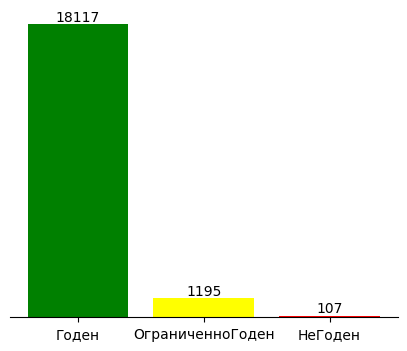

In [ ]:
ncol = 'ЗаключениеМК'
nzap = ['Годен','ОграниченноГоден','НеГоден']
zap = []
for i in nzap:
  zap.append(len(df[df[ncol]==i]))

#plt.bar(nzap,zap, color=['green','yellow','red'])

fig, ax = plt.subplots(figsize=(5,4))
bars = plt.bar(nzap,zap, color=['green','yellow','red'])
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.bar_label(bars)
plt.show()

Данные очень сильно разбалансированы. Прежде чем приступить к обучению нейронной сети, необходимо скорректировать данные.

In [ ]:
# размножим записи с НеГоден и ОграниченноГоден

print('Увеличение записей НеГоден')
df_0 = df.loc[df['ЗаключениеМК'] == 'НеГоден']
print(df_0.shape)
df_0 = df_0.loc[np.repeat(df_0.index, 85)].reset_index(drop=True)
print(df_0.shape)
df = pd.concat([df, df_0], ignore_index=True)

print('Увеличение записей ОграниченноГоден')
df_1 = df.loc[df['ЗаключениеМК'] == 'ОграниченноГоден']
print(df_1.shape)
df_1 = df_1.loc[np.repeat(df_1.index, 8)].reset_index(drop=True)
print(df_1.shape)
df = pd.concat([df, df_1], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)  # перемешивание строк в итоговом датасете

print('Датасет после изменения',df.shape)

Увеличение записей НеГоден
(107, 18)
(9095, 18)
Увеличение записей ОграниченноГоден
(1195, 18)
(9560, 18)
Датасет после изменения (38074, 18)


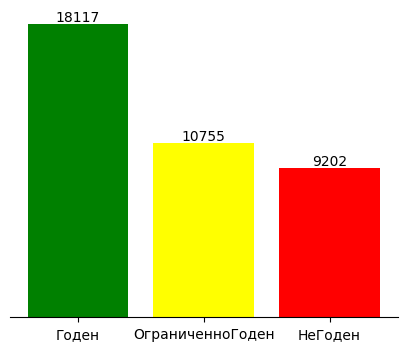

In [ ]:
ncol = 'ЗаключениеМК'
nzap = ['Годен','ОграниченноГоден','НеГоден']
zap = []
for i in nzap:
  zap.append(len(df[df[ncol]==i]))

#plt.bar(nzap,zap, color=['green','yellow','red'])

fig, ax = plt.subplots(figsize=(5,4))
bars = plt.bar(nzap,zap, color=['green','yellow','red'])
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.bar_label(bars)
plt.show()

## Создание категориальных колонок

### Возраст

In [ ]:
#  добавление категориального возраста  14-18:0, 19-23:1, ... , 94-98:16
#df['Возраст_'] = pd.Series(dtype='int')
df['Возраст_'] = ((df['Возраст']-14)//5).astype(int)
#df['Возраст_'] = (df[ncol]-14)//5

print('Категории возраста 14-18:0, 19-23:1, ... , 94-98:16')
print(list(sorted(df['Возраст_'].unique())))


Категории возраста 14-18:0, 19-23:1, ... , 94-98:16
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


### Кодирование категориальных данных в один вектор

In [ ]:

#  Кодирование категориальных данных (столбцов) в один вектор

def labelsToOneHot(column):
  vocab, indexes = np.array(np.unique(df[column], return_inverse=True))
  oneHotData = utils.to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab))
  return oneHotData, vocab.tolist()

labelData = ['Возраст_','КлиентПол']

oneHotArray = []
vocabulary = []
oneHot = []

for column in labelData: # Проходим по всем столбцам
  oneHotData, vocab = labelsToOneHot(column)
  vocabulary.append(vocab)
  oneHot.append(oneHotData)
  oneHotArray = np.concatenate([i for i in oneHot], axis = 1)


<ipython-input-574-6bd98cd8bd41>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vocab, indexes = np.array(np.unique(df[column], return_inverse=True))


In [ ]:
sum=0

for col in range(len(vocabulary)):

  print(f'Число уникальных элементов в {labelData[col]}: {len(vocabulary[col])}')
  sum += len(vocabulary[col])

print('Общий размер вектора', sum)

print(oneHotArray.shape)

Число уникальных элементов в Возраст_: 14
Число уникальных элементов в КлиентПол: 2
Общий размер вектора 16
(38074, 16)


### Цех и Профессия

Для категорирования объединяем значение из 'Цех' и 'Профессия'

In [ ]:
#
ncol = 'Цех'

df[ncol].replace(np.nan, '', inplace=True)   # замена для правильной обработки далее
df[ncol].replace('Без отдела', '', inplace=True)   # убираем 'без отдела'

ncol = 'Профессия'

df[ncol].replace(np.nan, '', inplace=True)   # замена для правильной обработки далее

#print(df[ncol].unique())

ncol = 'ЦехПроф_'
df[ncol] = df[['Цех','Профессия']].agg(' '.join, axis= 1)    # объединение значение всех нужных столбцов в один

unique = set(df[ncol].str.split(' ').sum())
print('Число уникальных слов:',len(unique))

Число уникальных слов: 3379


Токенизируем общее значение для преобразование текстов в последовательности

In [ ]:
ncol = 'ЦехПроф_'
unique = set(df[ncol].str.split(' ').sum())

# Токенизатор для преобразование текстов в последовательности
VOCAB_SIZE = 2500           #len(unique) +1

# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE,                                           # Максимальное кол-во слов
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',  # Фильтры исходного текста
                      lower=True,                                                     # Все буквы к нижнему регистру
                      split=' ',                                                      # разделение слов пробелом
                      oov_token='unknown',                                            # Один лейбл для всех незнакомых слов
                      char_level=False)                                               # Без выравнивания символов

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(df[ncol])

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

print(items)

# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(df[ncol]), dtype=object)
# Вывод формы и примера данных
print(x_data.shape)
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(df[ncol])
# Вывод формы и примера данных
print(x_data_01.shape)
print(df[ncol][15])
print(x_data_01[15, :])

[('unknown', 1), ('по', 2), ('и', 3), ('инженер', 4), ('водитель', 5), ('разряда', 6), ('монтажник', 7), ('технологических', 8), ('слесарь', 9), ('скважин', 10), ('автомобиля', 11), ('оператор', 12), ('ремонта', 13), ('специалист', 14), ('отдел', 15), ('участок', 16), ('капитального', 17), ('трубопроводов', 18), ('цех', 19), ('ведущий', 20), ('категории', 21), ('машинист', 22), ('ремонту', 23), ('5', 24), ('уфа', 25), ('6', 26), ('служба', 27), ('повар', 28), ('текущего', 29), ('№2', 30), ('ооо', 31), ('главный', 32), ('1', 33), ('4', 34), ('установок', 35), ('мастер', 36), ('старший', 37), ('работ', 38), ('электромонтер', 39), ('начальник', 40), ('обслуживанию', 41), ('подразделение', 42), ('2', 43), ('электромонтажник', 44), ('вышкомонтажник', 45), ('в', 46), ('помощник', 47), ('менеджер', 48), ('электрогазосварщик', 49), ('электрооборудования', 50), ('экспедитор', 51), ('025', 52), ('продавец', 53), ('производственный', 54), ('работник', 55), ('группа', 56), ('обособленное', 57), ('

In [ ]:
#  Добавление в общий вектор
oneHotArray = np.concatenate((oneHotArray, x_data_01), axis=1)
print(oneHotArray.shape)

(38074, 2516)


### Вредные факторы

In [ ]:

ncol = 'ВредныеФакторы'
unique = set(df[ncol].str.split(',').sum())

# Токенизатор для преобразование текстов в последовательности
VOCAB_SIZE = len(unique) +1

# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='', lower=True, split=',', oov_token='?', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(df[ncol])

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

print(items)

# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(df[ncol]), dtype=object)
# Вывод формы и примера данных
print(x_data.shape)
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(df[ncol])
# Вывод формы и примера данных
print(x_data_01.shape)
print(df[ncol][15])
print(x_data_01[15, :])


[('?', 1), ('5.1', 2), ('11.1', 3), ('4.4', 4), ('6.1', 5), ('23', 6), ('4.2.5', 7), ('11.4', 8), ('6.2', 9), ('18.1', 10), ('4.7', 11), ('6', 12), ('15', 13), ('9', 14), ('18.2', 15), ('1.50', 16), ('17', 17), ('4.3.2', 18), ('4.8', 19), ('4.3.1', 20), ('13', 21), ('11.3', 22), ('25', 23), ('11', 24), ('1.1', 25), ('12', 26), ('3.1.7', 27), ('27', 28), ('1.39', 29), ('1.29.2', 30), ('4.1', 31), ('18', 32), ('4.2.1', 33), ('1.30.1', 34), ('3.1.2', 35), ('26', 36), ('1.37.1', 37), ('1.14.2', 38), ('1.23', 39), ('3.1', 40), ('4.9', 41), ('1.5', 42), ('1.3', 43), ('1.37.2', 44), ('1.36.1', 45), ('5.2', 46), ('4.2.3', 47), ('1.34.1', 48), ('22', 49), ('5.2.1', 50), ('1.15', 51), ('4.3', 52), ('1.8.1.1', 53), ('8', 54), ('4.5', 55), ('4.2.4', 56), ('3.4', 57), ('4.2.2', 58), ('2.4.2', 59), ('4.10', 60), ('1.29.1', 61), ('1.17', 62), ('4.2', 63), ('1.2', 64), ('4.6', 65), ('1.48', 66), ('3.1.9.3', 67), ('24', 68), ('1.19.1', 69), ('1.29.4', 70), ('1.8.1.2', 71), ('3.1.1', 72), ('3.1.8.2', 73

In [ ]:
#  Добавление в общий вектор
oneHotArray = np.concatenate((oneHotArray, x_data_01), axis=1)
print(oneHotArray.shape)

(38074, 2669)


### MКБ

In [ ]:
ncol = 'МКБ_'
unique = set(df[ncol].str.split(',').sum())

VOCAB_SIZE = len(unique) +1
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer1 = Tokenizer(num_words=VOCAB_SIZE, filters='', lower=False, split=',', oov_token='?', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer1.fit_on_texts(df[ncol])

# Построение словаря в виде пар слово - индекс
items = list(tokenizer1.word_index.items())

print(items)

# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x1_data = np.array(tokenizer1.texts_to_sequences(df[ncol]), dtype=object)
# Вывод формы и примера данных
print(x1_data.shape)
print(x1_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x1_data_01 = tokenizer1.texts_to_matrix(df[ncol])
# Вывод формы и примера данных
print(x1_data_01.shape)
print(df[ncol][7])
print(x1_data_01[7, :])

[('?', 1), ('H52.1', 2), ('I11.9', 3), ('H52.0', 4), ('H52.2', 5), ('K02.1', 6), ('K29.3', 7), ('K04.5', 8), ('K26.9', 9), ('K29.5', 10), ('R73.9', 11), ('K03.6', 12), ('F10.3', 13), ('K26.3', 14), ('F06.8', 15), ('N95.1', 16), ('N95.2', 17), ('F06.6', 18), ('E14.9', 19), ('K29.6', 20), ('H91.1', 21), ('D25', 22), ('K26.7', 23), ('D25.9', 24), ('K25.3', 25), ('H90.3', 26), ('R25.1', 27), ('J33.0', 28), ('H74.1', 29), ('K05.3', 30), ('I25.9', 31), ('K02.0', 32), ('N86', 33), ('K86.1', 34), ('N90.4', 35), ('K40.2', 36), ('I10', 37), ('H25', 38), ('I45.6', 39), ('H33.0', 40), ('H53.0', 41), ('M42.1', 42), ('K29.8', 43), ('H27.0', 44), ('T90.4', 45), ('I25.2', 46), ('I25.8', 47), ('H11.0', 48), ('H40.1', 49), ('N83.2', 50), ('H50.1', 51), ('I49.9', 52), ('D50.9', 53), ('F60.3', 54), ('K00.0', 55), ('H25.1', 56), ('N70.9', 57), ('E11.9', 58), ('H40.9', 59), ('I49.8', 60), ('F06.9', 61), ('K25.9', 62), ('K40.9', 63), ('K25.7', 64), ('K08.1', 65), ('F70.0', 66), ('F10.2', 67), ('G25.9', 68), 

In [ ]:
#  Добавление в общий вектор
oneHotArray = np.concatenate((oneHotArray, x_data_01), axis=1)
print(oneHotArray.shape)

(38074, 2822)


### ЗаключениеМК

In [ ]:

ncol = 'ЗаключениеМК'

print(df[ncol].unique())
result, y_vocab = labelsToOneHot(ncol)
CLASS_COUNT  = result.shape[1]
print(result.shape)


['Годен' 'НеГоден' 'ОграниченноГоден']
(38074, 3)


<ipython-input-574-6bd98cd8bd41>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vocab, indexes = np.array(np.unique(df[column], return_inverse=True))


### Деление датасета на части: тренировочная, тестовая

In [ ]:
# Деление датасета на части: тренировочная, тестовая

# x_train, x_test, y_train, y_test = train_test_split(oneHotArray, result, test_size=0.2)
nsize = int(oneHotArray.shape[0] * 0.2)     #  20% на тест

x_test = oneHotArray[:nsize]
y_test = result[:nsize]

x_train = oneHotArray[nsize:]
y_train = result[nsize:]

print('тестовая выборка')
print(x_test.shape)
print(y_test.shape)
print('тренировочная выборка')
print(x_train.shape)
print(y_train.shape)


тестовая выборка
(7614, 2822)
(7614, 3)
тренировочная выборка
(30460, 2822)
(30460, 3)


# Создаем нейросеть

In [ ]:
# Создаем нейросеть

model = Sequential()

model.add(Dense(200, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train,
                    y_train,
                    epochs= 60,
                    batch_size= 128,
                    validation_data=(x_test, y_test),
                    verbose=1,)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 200)               564600    
                                                                 
 batch_normalization_11 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_40 (Dense)            (None, 10)                2010      
                                                                 
 dense_41 (Dense)            (None, 3)                 33        
                                                                 
Total params: 567,443
Trainable params: 567,043
Non-trainable params: 400
_____________________________________________

0.9540320634841919


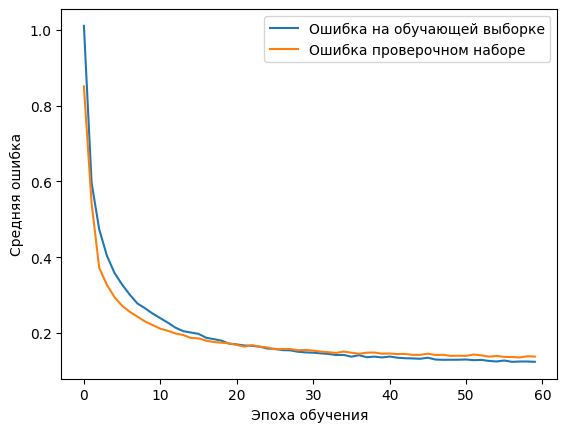

In [ ]:
print(np.amax(history.history['val_accuracy']))

#plt.figure(figsize=(x_size,y_size))
plt.plot(history.history['loss'],
         label='Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'],
         label='Ошибка проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

## Проверка результатов

проверяем результаты предсказания нейросети на тестовой выборке (не участвовшей в обучении)

In [ ]:
y_pred = model.predict(x_test)

res = np.zeros((3,2), dtype=int)

for i in range(y_test.shape[0]):
  if np.argmax(y_test[i,:]) == np.argmax(y_pred[i,:]):
    res[np.argmax(y_test[i,:]),0] += 1
  else:
    res[np.argmax(y_test[i,:]),1] += 1

print('Результаты предсказаний по тестовой выборке:')
print(f'                  верно  неверно  %')
print(f'         не годен {res[0,0]:>5}  {res[0,1]:>5}   {res[0,1]/res[0,0]:.1%}')
print(f'ограниченно годен {res[1,0]:>5}  {res[1,1]:>5}   {res[1,1]/res[1,0]:.1%}')
print(f'            годен {res[2,0]:>5}  {res[2,1]:>5}   {res[2,1]/res[2,0]:.1%}')
print(f'-'*40)
print(f'                  {np.sum(res[:,0]):>5}  {np.sum(res[:,1]):>5}   {np.sum(res[:,1])/np.sum(res[:,0]):.1%}')
print(f'  размер тестовой выборки: {y_test.shape[0]}')


238/238 [==============================] - 2s 9ms/step
Результаты предсказаний по тестовой выборке:
                  верно  неверно  %
         не годен  3330    288   8.6%
ограниченно годен  1863      0   0.0%
            годен  2067     66   3.2%
----------------------------------------
                   7260    354   4.9%
  размер тестовой выборки: 7614


## Вывод информации

In [ ]:
# загрузка базы МКБ
url = 'https://drive.google.com/file/d/1EyCr0naRtgZoePMcfHvGrBAQvmggX43Z/view?usp=sharing'
url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

db_mkb = pd.read_csv(url, sep=';', error_bad_lines=False, encoding='utf-8' )


<ipython-input-588-c0b9530f57af>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  db_mkb = pd.read_csv(url, sep=';', error_bad_lines=False, encoding='utf-8' )


In [ ]:
# функция вывода диагноза по коду МКБ
# Код диагноза;Название диагноза;Код родителя
def info_mkb(kod):
  if (db_mkb['Код диагноза'].eq(kod)).any():
    diagn = db_mkb[db_mkb['Код диагноза'] == kod].iloc[0]['Название диагноза']
  else:
    diagn =  'нет в базе :('
  return diagn


вывод полной информации по клиенту из датасета по индексу

In [ ]:

# функция вывода предсказания
# если ver=True выводит процентное значение (Годен:99%  Ограниченно годен:0%  Не годен:1%)
def clpred(ind, ver=False):
  resstr = [ 'Годен', 'Ограниченно годен', 'Не годен']
  str= ''
  for i in [0,1,2]:
    str += '{}:{:.0%}  '.format(resstr[i], all_pred[ind,i])
  if not ver:
    str = resstr[np.argmax(all_pred[ind,:])]
  return str

# вывод полной информации
def clinfo(ind):
  print(f'Документ прохождения медосмотра:',df.iloc[ind]['ДокументПрохождениеМедосмотра'])
  print(f'                    Код клиента:',df.iloc[ind]['Клиент'])
  print(f'                   ДатаРождения:',df.iloc[ind]['КлиентДатаРождения'].strftime('%d.%m.%Y'))
  print(f'                            Пол:',df.iloc[ind]['КлиентПол'])
  print(f'     Дата завершения медосмотра:',df.iloc[ind]['ДатаЗавершенияМедосмотра'].strftime('%d.%m.%Y'))
  print(f'                        Возраст:',(df.iloc[ind]['Возраст']).astype(int))
  print(f'                 Тип медосмотра:',df.iloc[ind]['ТипМедосмотра'])
  if df.iloc[ind]['ПсихОсвидетельствование']:
    psihosv = 'пройдено'
  else:
    psihosv = 'нет'
  print(f'        Психосвидетельствование:',psihosv)
  print(f'                Код контрагента:',df.iloc[ind]['Контрагент'])
  print(f'                            Цех:',df.iloc[ind]['Цех'])
  print(f'                      Профессия:',df.iloc[ind]['Профессия'])
  print(f'                Вредные факторы:',df.iloc[ind]['ВредныеФакторы'])
  diagn = []
  if df.iloc[ind]['МКБ_'] == '':
    diagn = ['Z00.0']
  else:
    diagn = df.iloc[ind]['МКБ_'].split(',')
  print(f'                  Диагноз МКБ10:')
  for i in diagn:
    print(f'                                 {i:5} {info_mkb(i)}')
  print('')
  print(f'                  Заключение МК:',df.iloc[ind]['ЗаключениеМК'])
  print(f'                     Заключение:',df.iloc[ind]['Заключение'])
  print('')
  print(f'                   Предсказание:',clpred(ind, ver=True))
#  'ДиагнозОписание'

In [ ]:
# создание предсказаний для всей базы
all_pred = model.predict(oneHotArray)

1190/1190 [==============================] - 8s 6ms/step


In [ ]:
#  вывод информации по случайному индексу
clinfo(3759)


Документ прохождения медосмотра: 69fb8978-0651-11ed-8103-0cc47aab8067
                    Код клиента: 071fe3ad-c7ba-11e9-80cf-0cc47aab8067
                   ДатаРождения: 17.09.2000
                            Пол: Мужской
     Дата завершения медосмотра: 18.07.2022
                        Возраст: 21
                 Тип медосмотра: Периодический
        Психосвидетельствование: нет
                Код контрагента: 173d6ba7-12fe-11e7-80d3-708bcd7f83cd
                            Цех: 
                      Профессия: Механик
                Вредные факторы: 4.2.5,11.1
                  Диагноз МКБ10:
                                 H52.1 Миопия
                                 K29.6 Другие гастриты

                  Заключение МК: Годен
                     Заключение: Годен к работе в указанных условиях

                   Предсказание: Годен:98%  Ограниченно годен:0%  Не годен:2%  


# Выводы

 На основании предоставленных заказчиком данных была создана и обученна нейронная сеть реализующая функцию рекомендательной системы для врача профпатолога. Из полученных нескольких файлов был сформирован общий датасет. Однако данные в нем оказались очень сильно разбалансированы по интересующим нас категориям. Для правильной работы нейросети было произведено дублирование данных необходимых категорий. В результате была достигнута нужная точность более 95%.





---
---
---
---

